In [1]:
import numpy as np
import pandas as pd

file_path = "../../data/raw/yp_competitors_rws.csv"
dataset = pd.read_csv(file_path) 

## Stats for All

In [2]:
dataset.head()

,alias,ratingValue,dataPublished,description,author
0,kimos-maui-lahaina,5,2019-01-06,I stumbled across this great restaurant overlo...,Bella L.
1,kimos-maui-lahaina,5,2019-01-04,Excellent view on the ocean at sunset.\nExcell...,Rachou A.
2,kimos-maui-lahaina,3,2018-12-25,This place was not what the reviews portrayed ...,Ozzetta B.
3,kimos-maui-lahaina,2,2018-12-08,We were excited to repeat our Keoki's (in Kaua...,Arleen C.
4,kimos-maui-lahaina,3,2018-11-29,"If you're looking for a tourist spot, this is ...",Carol B.


In [3]:
dataset.ratingValue.mean()

4.18671784625092

In [63]:
dataset.ratingValue.value_counts()

5    11050
4     3970
3     1669
1     1172
2     1157
Name: ratingValue, dtype: int64

In [5]:
dataset.alias.value_counts()[:10]

ululanis-hawaiian-shave-ice-lahaina    2611
kimos-maui-lahaina                     2568
lahaina-fish-lahaina                   1943
lahaina-grill-lahaina                  1845
808-grindz-cafe-lahaina-2              1772
fleetwoods-lahaina-5                   1250
lahaina-luna-cafe-lahaina              1032
longhis-lahaina                         638
lahaina-pizza-company-lahaina           637
sale-pepe-lahaina                       632
Name: alias, dtype: int64

In [10]:
from nltk import word_tokenize
from nltk import Text
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize

# using nltk.Text object
def create_text(reviews):
    result = []
    for review in reviews:
        result.extend(word_tokenize(review))
    return Text(result)

def lexical_diversity(text):
    return len(set(text)) / len(text)

def vocabulary_size(text):
    text.tokens = [x.lower() for x in text.tokens if x.isalpha()]
    vocab = len(set(text))
    return vocab

def content_size(tokens):
    sw_list = stopwords.words('english')
    content = [w for w in tokens if w.lower() not in sw_list]
    return round(len(content) / len(tokens), 5)

In [9]:
reviews = create_text(dataset.description)
reviews

<Text: I stumbled across this great restaurant overlooking the...>

In [11]:
_text = "".join(dataset.description)

In [12]:
len(word_tokenize(_text))

1900597

In [14]:
len(reviews.tokens)

1924253

In [13]:
len(sent_tokenize(_text))

117031

In [15]:
vocabulary_size(reviews)

20609

In [16]:
lexical_diversity(reviews)

0.012566509389668499

In [17]:
sorted(reviews.vocab().most_common(10), reverse=True)

[('we', 26568),
 ('was', 39260),
 ('to', 33786),
 ('the', 94474),
 ('of', 22990),
 ('it', 26174),
 ('i', 33958),
 ('for', 19429),
 ('and', 60152),
 ('a', 40103)]

In [58]:
maxlen = max(len(word) for word in reviews.tokens)
[word for word in reviews.tokens if len(word) == (maxlen)]

['thecriticalsimoncowellyelper', 'thecriticalsimoncowellyelper']

In [44]:
fd = reviews.vocab()
cumulative = 0
most_common_words = [word for (word, count) in fd.most_common()]
for rank, word in enumerate(most_common_words):
    cumulative += fd.freq(word)
    print("%3d %6.2f%% %s" % (rank + 1, cumulative * 100, word))
    if cumulative > 0.25:
        break

  1   5.76% the
  2   9.43% and
  3  11.87% a
  4  14.27% was
  5  16.34% i
  6  18.40% to
  7  20.02% we
  8  21.61% it
  9  23.02% of
 10  24.20% for
 11  25.37% is


In [18]:
reviews.vocab().plot(20, cumulative=50)

<Figure size 640x480 with 1 Axes>

In [19]:
reviews.vocab()["common"]

35

In [20]:
content_size(reviews.tokens)

0.51308

In [23]:
some_words_freq = sorted(w for w in set(reviews.vocab()) if reviews.vocab()[w] > 3000 and reviews.vocab()[w] < 4000)
print(some_words_freq)

['about', 'also', 'amazing', 'an', 'by', 'did', 'dinner', 'do', 'go', 'got', 'he', 'lahaina', 'nice', 'or', 'ordered', 'restaurant', 'their', 'up', 'view', 'what', 'when', 'will', 'your']


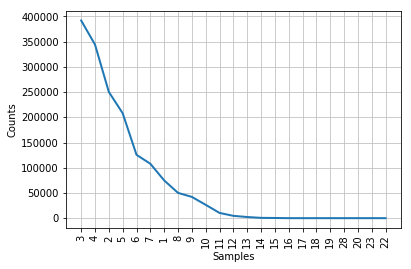

In [24]:
from nltk import FreqDist
word_lengths = FreqDist(len(w) for w in reviews)
word_lengths.plot()

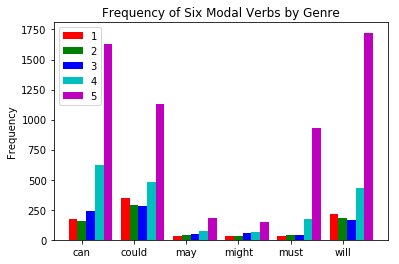

In [92]:
from numpy import arange
from matplotlib import pyplot
import nltk
colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width, color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Rating')
    pyplot.show()
    
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = ConditionalFreqDist(
    (row.ratingValue, word)
    for i, row in dataset.iterrows()
    for word in word_tokenize(row.description)
    if word in modals
)
counts = {}
for i in range(1, 6):
    counts[i] = [cfdist[i][word] for word in modals]
bar_chart(range(1, 6), modals, counts)

In [105]:
from nltk import ConditionalFreqDist
import datetime
dataset.dataPublished = pd.to_datetime(dataset.dataPublished)
dataset["day"] = dataset.dataPublished.apply(lambda x: x.strftime("%A"))
cfd = ConditionalFreqDist(
    (business.alias, business.day) 
    for index, business in dataset.iterrows()
)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
cfd.tabulate(samples=days)

                                                   Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
                      808-grindz-cafe-lahaina-2       181       271       261       250       253       293       263 
                    aloha-kacoffeeaka-lahaina-4         1         0         0         0         1         0         0 
        beach-sunset-yoga-hawaii-maui-lahaina-3         1         0         0         0         0         0         0 
                               blu-maui-lahaina         0         1         0         0         0         0         0 
                      bobs-dogs-of-maui-lahaina         4         3         4         2         1         7         5 
                 bubba-gump-shrimp-co-lahaina-3        87        84        73        80        63        87        95 
                         cafe-cafe-maui-lahaina        42        25        25        26        31        23        30 
             cheeseburger-in-paradise-lahaina-2 

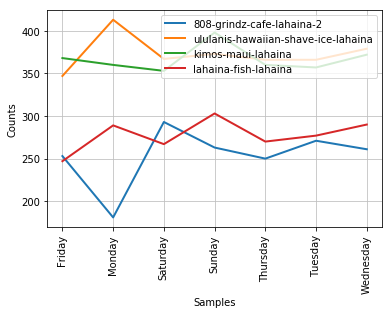

In [116]:
cfd.plot(conditions=[
    "808-grindz-cafe-lahaina-2", 
    "ululanis-hawaiian-shave-ice-lahaina", 
    "kimos-maui-lahaina",
    "lahaina-fish-lahaina"]
)

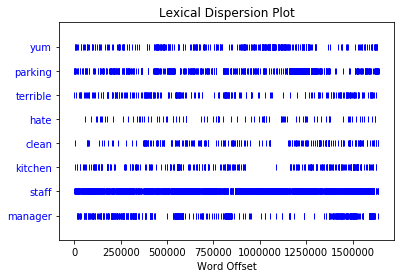

In [30]:
reviews.dispersion_plot(["yum", "parking", "terrible", "hate", "clean", "kitchen", "staff", "manager"])

## Stats for Individual Records

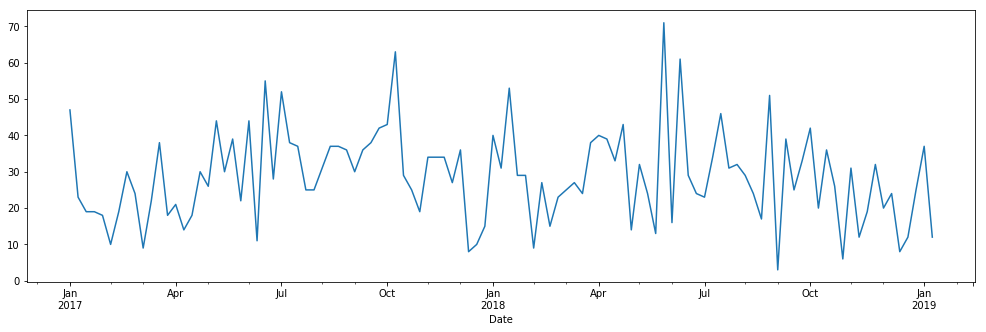

In [34]:
import datetime
dataset.dataPublished = pd.to_datetime(dataset.dataPublished)
dataset['Date'] = pd.to_datetime(dataset['dataPublished']) - pd.to_timedelta(5, unit='d')
a = dataset.loc[dataset.alias == 'kimos-maui-lahaina'].groupby([pd.Grouper(key="Date", freq="W-MON")])['ratingValue'].sum()
# a.plot('line', figsize=(15, 10))
a[a.index > datetime.datetime(2017, 1, 1)].plot('line', figsize=(17, 5))

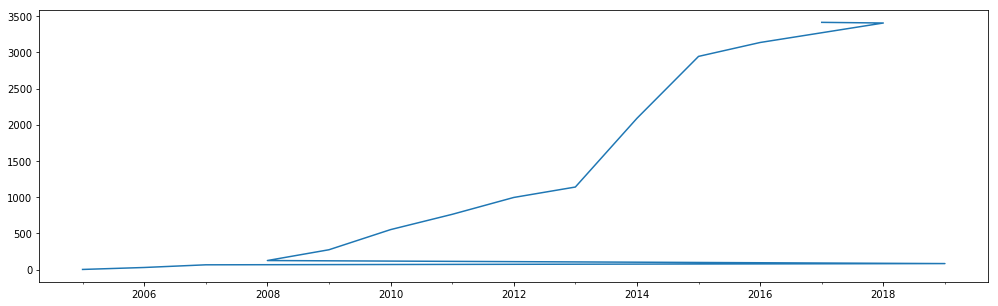

In [33]:
a = dataset.Date.apply(lambda t: t.to_period(freq='y')).value_counts()
a.plot('line', figsize=(17, 5))

In [36]:
businesses = set(dataset.alias)
results = []
for business in businesses:
    data = dataset.loc[dataset.alias == business]
    _concataneted = "".join(data.description)
    text = create_text(data.description)
    word_len = len(word_tokenize(_concataneted))
    sent_len = len(sent_tokenize(_concataneted))
    results.append({
        "rating_cnt": len(data),
        "rating_avg": data.ratingValue.mean(),
        "rating_sum": data.ratingValue.sum(),
        "lexical_diversity": lexical_diversity(text),
        "tokens_size": len(text),
        "vocabulary_size": vocabulary_size(text),
        "words_in_sent_avg": word_len / sent_len,
        "word_tokenize": word_len,
        "sent_tokenize": sent_len,
        "content_size": content_size(text.tokens)
    })

In [37]:
pd.DataFrame(results, index=businesses).sort_values("tokens_size", ascending=False).head()

,content_size,lexical_diversity,rating_avg,rating_cnt,rating_sum,sent_tokenize,tokens_size,vocabulary_size,word_tokenize,words_in_sent_avg
kimos-maui-lahaina,0.51152,0.039341,4.027648,2568,10343,16306,268705,7473,265309,16.270637
lahaina-grill-lahaina,0.51006,0.043691,4.546883,1845,8389,14713,247806,7748,245498,16.685788
ululanis-hawaiian-shave-ice-lahaina,0.51994,0.037418,4.790885,2611,12509,14625,244430,6450,241616,16.520752
lahaina-fish-lahaina,0.51960,0.049239,3.985589,1943,7744,10670,169094,6046,166645,15.618088
808-grindz-cafe-lahaina-2,0.51225,0.043341,4.537810,1772,8041,10702,168246,5055,166168,15.526817


In [ ]:
"sdfa".isalpha()

In [ ]:
len(reviews)

In [ ]:
len(reviews.tokens)